In [39]:
import requests
import scipy

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import seaborn as sns

plt.style.use('seaborn-whitegrid')


import pandas as pd
import numpy as np

# google sheets integration:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import warnings
warnings.filterwarnings("ignore")

# our own package for reading the data
import sddk

In [4]:
# to always print all columns expanded
pd.set_option('display.max_columns', None)

In [5]:
# read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [6]:
# login to sciencedata
# (not necessary for reading-only)
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [7]:
# to access our gsheet with data overview & metadata, you need a Google Service Account json file
# (see google-auth python package documentation to start with)
# I have mine located in my personal space on sciencedata.dk, so I read it from there:

# (1) read the file and parse its content
try:
    file_data = conf[0].get("https://sciencedata.dk/files/ServiceAccountsKey.json").json()
except:
    print("cannot find file ServiceAccountsKey.json")
# (2) transform the content into crendentials object
credentials = service_account.Credentials.from_service_account_info(file_data)
# (3) specify your usage of the credentials
scoped_credentials = credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
# (4) use the constrained credentials for authentication of gspread package
gc = gspread.Client(auth=scoped_credentials)
# (5) establish connection with spreadsheets specified by their url
EDH_overview = gc.open_by_url("https://docs.google.com/spreadsheets/d/164MLxVcCZg95Bzf9fVyD1-iCA5V97eM3KAFllyhTvt4/edit?usp=sharing")

In [8]:
# read the EDH dataset from sciencedata.dk
publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_attrs_cleaned_2020-09-30.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,0051,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,0131,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription,Cer

In [9]:
# make sure that we work with numeric values
EDH["not_before"] = pd.to_numeric(EDH["not_before"])
EDH["not_after"] = pd.to_numeric(EDH["not_after"])

In [10]:
EDH.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,170.0,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,131.0,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription

In [11]:
len(EDH)

81476

# EDH_dated

In [12]:
### how many of the inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [13]:
len(EDH_dated[EDH_dated["not_before"].notnull()])

59788

In [14]:
len(EDH_dated[EDH_dated["not_after"].notnull()])

56281

To sum up, there is 81,476 inscriptions in the current version of the database. 59,788 of them have at least `"not_before"` value.  56,281 have both `"not_before"` and `"not_after"`. 

Our modeling functions require at least one date, it might be either a precise date or *post quem* minus one year.

Text(0.5, 1.0, 'EDH "not_before" & "not_after" - histogram')

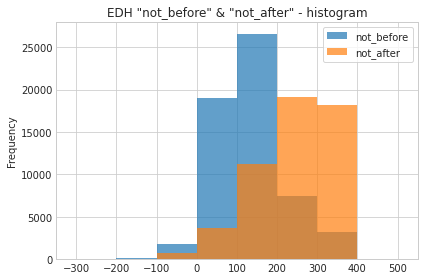

In [40]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
l1 = EDH_dated["not_before"].plot.hist(ax=ax, bins=range(-500,500, 100), alpha=0.7)
l2 = EDH_dated["not_after"].plot.hist(ax=ax, bins=range(-500,500, 100), alpha=0.7)
ax.set_xlim(-350, 550)
ax.set_xticks(range(-300,600,100))
ax.legend(frameon=True)
ax.set_title('EDH "not_before" & "not_after" - histogram')

In [ ]:
# sddk.write_file("SDAM_data/EDH/public/EDH_not_before_not_after_hist.png", fig, conf)

In [42]:
len(EDH_dated[EDH_dated["not_before"]==101])

9865

In [43]:
len(EDH_dated[EDH_dated["not_after"]==300])

15221

# Exploring "not_before" only

In [44]:
# look at inscriptions without "not_after"
EDH_not_before_only = EDH_dated[EDH_dated["not_after"].isnull()]
len(EDH_not_before_only)

3507

In [45]:
EDH_not_before_only.head(20)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration
48,Feraudi,boundary inscription,7-8 cm,NaN,"AE 1983, 0032.; G. Pisani Sartorio, in: G. Bar...",checked with photo,(87) cm,M VALERIVS M F / M N MESSAL / P SERVEILIVS C F...,"[{'praenomen': 'M.', 'cognomen': 'Messalla*', ...",37 cm,travertine: rocks - chemische Sedimente,cippus,Roma,70 cm,M(arcus) Valerius M(arci) f(ilius) / M(ani) n(...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2011-03-17,Lazio,Roma,Latin,HD000049,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Terminalcippus.,https://www.trismegistos.org/text/265587,-54.0,La Magliana,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,None,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,data available,None,"[12.4823, 41.8955]",265587,"[http://www.trismegistos.org/place/000172, htt...",Marcus Valerius Marci filius Mani nepos Messal...,54 BC,21,unbestimmt,85,Cippus,71,Travertin,1000,293,Grenzmarkierung,boundary inscription,Certain,87.0,70.0,37.0,Travertine,cippus,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,La Magliana,Certain,54 BC,-54.0,1
51,Feraudi,votive inscription,4.3-3 cm,NaN,"AE 1983, 0045.; G. Barbieri, in: G. Barbieri (...",checked through autopsy,(59) cm,PRO SALVTE ET REDITV / ET VICTORIAS DOM N / IM...,"[{'gender': 'male', 'cognomen': 'Antoninus', '...",None,marble: rocks - metamorphic rocks,tabula,Roma?,(69.5) cm,Pro salute et reditu / et victorias(!) dom(ini...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma?,2011-01-17,Lazio?,Roma?,Latin,HD000052,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Inschrift für Caracalla aus der Collezione Mu...,https://www.trismegistos.org/text/251116,213.0,None,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,data available,"[12.4823, 41.8955]",251116,"[http://www.trismegistos.org/place/000172, htt...",Pro salute et reditu et victor...,213 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,80,Weihinschrift,votive inscription,Certain,59.0,69.5,NaN,Marble,tabula,Certain,Roma,Uncertain,Italy,Certain,Roma,Uncertain,Lazio,Uncertain,Roma,Uncertain,NULL,NULL,213 AD,213.0,1
53,Cowey,votive inscription,None,NaN,"AE 1983, 0643. (B); J.E. Bogaers, in: B. Hartl...",checked with photo,(49) cm,[ ] ET GENIO LOCI / [ ]GG L VIDVCIVS / [ ]CIDV...,"[{'occupation': 'data available', 'praenomen':...",14 cm,sandstone: rocks - clastic sediments,tabula,Britannia,(63) cm,[---] et Genio loci / [et numinib(us) Au]gg(us...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Eburacum,2016-12-30,North Yorkshire,York,Latin,HD000054,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): Abweichungen in Lesung und Ergänzung. Se...,https://www.trismegistos.org/text/167301,221.0,Clementhorpe,1976,"York, Yorkshire Mus.",None,names of pagan deities,None

In [46]:
# look at the commentary column
EDH_not_before_only["commentary"] = EDH_not_before_only["commentary"].fillna("")
print("contains 'post quem': ", len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("post quem")]))
print("contains 'ante quem': ", len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("ante quem")]))

contains 'post quem':  3
contains 'ante quem':  2


In [47]:
# in how many cases there is a day and month?
len(EDH_not_before_only[EDH_not_before_only["origdate_text_clean"].str.contains(r"\d+\.\d+")])

725

In [48]:
# how do they look like?
print(EDH_not_before_only["origdate_text_clean"].tolist())

['54 BC', '213 AD', '221 AD', '406 AD', '146 AD', '116 AD', '12.2.224 AD', '182 AD', '34 AD', '7 AD', '9 AD', '13.8.232 AD', '332 AD', '270 AD', '201 AD', '79 AD', '211 AD', '306 AD', '218 AD', '238 AD', '98 AD', '8.2.157 AD', '11 BC', '17.9.67 BC', '275 AD', '15.5.87 BC', '14.10.205 AD', '1.9.114 AD', '27.12.159 AD', '27.12.159 AD', '8.2.157 AD', '9.5.136 AD', '38 AD', '108 AD', '19 AD', '15.7.60 AD', '102 AD', '102 AD', '253 AD', '163 AD', '23.8.219 AD', '260 AD', '133 AD', '45 BC', '197 AD', '198 AD', '84 AD', '253 AD', '28.10.144 AD', '26.8.258 AD', '47 AD', '253 AD', '541 AD', '121 AD', '544 AD', '208 AD', '1.2.225 AD', '390 AD', '202 AD', '11.6.313 AD', '11.6.297 AD', '1 AD – 50 AD', '1 AD – 50 AD', '11.6.291 AD', '11.6.159 AD', '20.2.98 AD', '48 AD', '27 BC', '48 AD', '8.210 AD', '202 AD', '17.6.437 AD', '100 AD', '28.8.163 AD', '146 AD', '95 AD', '22.11.106 BC', '214 AD', '1.6.42 AD', '15.5.53 AD', '377 AD', '75 AD', '54 BC', '250 AD', '398 AD', '21.5.55 AD', '262 AD', '166 AD'

In [49]:
# there are some with "NULL" in "origdate_text_clean"
EDH_not_before_only.tail(4)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration
81313,Osnabrügge,votive inscription,None,NaN,"AE 1961, 0239.; CIL 13, 05609.; Y. Le Bohec, I...",provisional,None,[ ] O M / / [ ]T GENIO LO[ ] / Q TA[ ]IVS / SA...,"[{'cognomen': 'Saturninus', 'gender': 'male', ...",None,limestone: rocks - clastic sediments,altar,Germania superior,None,[I(ovi)] O(ptimo) M(aximo) // [e]t Genio lo[ci...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082227,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Z. 1 befindet sich auf der Bekrönung. Z. 3: T...,None,150.0,ehemalige Kirche,1837,"Dijon, Mus. Arch.",None,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,None,"[5.4128, 47.3048]",None,None,None,None,None,None,None,None,None,None,None,None,None,votive inscription,Certain,NaN,NaN,NaN,Limestone,altar,Certain,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,ehemalige Kirche,Certain,NULL,150.0,1
81344,Osnabrügge,honorific inscription,None,NaN,"M. Provost, in: M. Provost u. a. (Hrsg.), La C...",no image,(83) cm,] / POS[ ]I / DEDICATA / PRIMA [ / / IMP ANTON...,"[{'person_id': '1', 'name': 'Prima', 'cognomen...",None,None,None,Germania superior,(42) cm,------] / pos[---]I / dedicata / Prima [------...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082258,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Lesung und damit auch Datierung unsicher. Auf...,None,139.0,"Rue du 8 Mai 1945, Apotheke",1965,None,None,None,None,None,None,None,"[5.4155, 47.3047]",None,None,None,None,None,None,None,None,None,None,None,None,None,honorific inscription,Certain,83.0,42.0,NaN,NULL,NULL,NULL,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,"Rue du 8 Mai 1945, Apotheke",Certain,NULL,139.0,1
81425,Gräf,mile-/leaguestone,5 cm,NaN,"CIL 17, 02, 00134; Zeichnung.",checked with drawing,180 cm,IMP CAE[ ] / DIVI MAGNI [ ] / NINI PII [ ] DIV...,"[{'person_id': '1', 'praenomen': 'M.+++', 'cog...",None,Gesteine,mile-/leaguestone,Germania superior,45 cm,Imp(erator) Cae[s(ar)] / divi Magni [Anto]/nin...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2020-08-10,Auvergne-Rhône-Alpes,Prévessin-Moëns,Latin,HD082339,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Zahlreiche Ligaturen. Einige heute nicht mehr...,None,219.0,"Prévessin, de l’Assomption, Kirche, sekundär v...",None,"Prévessin-Moëns, Prévessin, de l’Assomption, K...",None,None,None,None,data available,None,"[6.0811, 46.2541]",None,None,None,None,None,None,None,None,None,None,None,None,None,mile-/leaguestone,Certain,180.0,45.0,NaN,Rock,mile-/leaguestone,Certain,Germani

To sum up the observcation made here, there is no indication that dates with `not_before` only should be approached as instances of *post quem* (minus 1). Instead, at least in a vast majority of cases, it seems appropriate to assess these instances as **exact dates**. Therefore, in these cases, we will copy-paste the value from `not_before` to a new *not after* column: `not_after_new` to be used for our later modeling. Otherwise missing not after values would be automatically interpreted as instances of *post quem*. 

In [50]:
def check_not_after(row):
    if np.isnan(row["not_after"]):
        not_after_new = row["not_before"]
    else: 
        not_after_new = row["not_after"]
    return not_after_new

EDH_dated["not_after_new"] = EDH_dated.apply(lambda row: check_not_after(row), axis=1)

In [51]:
EDH_dated[EDH_dated["id"]=="HD000102"]

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration
101,Cowey,military diploma,None,NaN,"AE 1983, 0639. (B); M.W.C. Hassall - R.S.O. To...",provisional,5.9 cm,[ ] / [ ] T AE[ ] / [ ]VS AVG PIVS P M / [ ] C...,"[{'cognomen': 'Hadrianus+ Antoninus+', 'name':...",1 cm,Bronze,tabula,Britannia,4.1 cm,[Imp(erator) Caesar divi Hadriani f(ilius) div...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Vindolanda,2020-03-02,Northumberland,Chesterholm,Latin,HD000102,https://edh-www.adw.uni-heidelberg.de/edh/geog...,"(B): Außenseite: Z.5: AE, Hassall: Ercu[io]; ...",https://www.trismegistos.org/text/167635,146.0,Lager,1980,"Vindolanda, Museum",None,names of pagan deities,None,data available,data available,data available,"[-2.3606, 54.9912]",167635,"[http://www.trismegistos.org/place/003201, htt...",Imperator Caesar divi Hadriani filius divi Tra...,146 AD,21,unbestimmt,257,Tafel,109,Bronze,1000,91,Militärdiplom,military diploma,Certain,5.9,4.1,1.0,Metal,tabula,Certain,Britannia,Certain,United Kingdom,Certain,Vindolanda,Certain,Northumberland,Certain,Chesterholm,Certain,Lager,Certain,146 AD,146.0,1


# Exploring durations

In [52]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration
  

EDH_dated["duration"] = EDH_dated.apply(lambda row: get_duration(row["not_before"], row["not_after_new"]), axis=1)

In [53]:
EDH_dated.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,130.0,60
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,200.0,150
2,Feraudi,honorific inscription,4.5-3 cm,170.0,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,131.0,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,10

In [54]:
# half century
dur_50 = len(EDH_dated[EDH_dated["duration"]==50])
dur_50

4232

In [55]:
# one century
dur_100 = len(EDH_dated[EDH_dated["duration"]==100])
dur_100

12202

In [56]:
# two centuries
dur_200 = len(EDH_dated[EDH_dated["duration"]==200])
dur_200

5354

In [57]:
len(EDH_dated)

59788

In [58]:
(dur_50 + dur_100 + dur_200) / len(EDH_dated)

0.3644209540375995

In [59]:
len(EDH_dated[EDH_dated["duration"]>=100])

34978

In [60]:
len(EDH_dated[EDH_dated["duration"]>=100]) / len(EDH_dated)

0.5850337860440222

In [61]:
durations = []
previous_duration = 0
for duration in [1, 25, 75, 125, 200]:
    if previous_duration == 0:
        durations.append([str(duration), len(EDH_dated[(EDH_dated["duration"]<= duration) & (EDH_dated["duration"] > previous_duration)])])
    else:
        durations.append([str(previous_duration + 1) + "-" +  str(duration), len(EDH_dated[(EDH_dated["duration"]<= duration) & (EDH_dated["duration"] > previous_duration)])])
    previous_duration = duration
durations.append([">200", len(EDH_dated[EDH_dated["duration"]>200])])
durations_df = pd.DataFrame(durations, columns=["less or equal years", "n of inscriptions"])

In [62]:
durations_df

,less or equal years,n of inscriptions
0,1,3508
1,2-25,6483
2,26-75,12652
3,76-125,15333
4,126-200,14576
5,>200,7236


Text(0.5, 1.0, "EDH: Length of interval 'not_before'-'not_after' - bar")

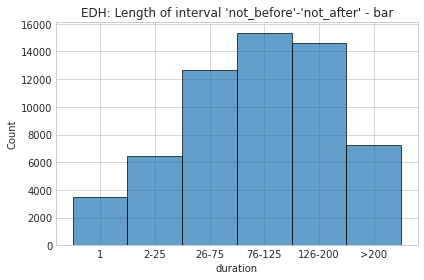

In [63]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(durations_df["less or equal years"], durations_df["n of inscriptions"], edgecolor="black", color="tab:blue", alpha=0.7, width=1)
ax.set_xlabel("duration")
ax.set_ylabel("Count")
ax.set_title("EDH: Length of interval 'not_before'-'not_after' - bar")

In [64]:
#sddk.write_file("SDAM_data/EDH/public/EDH_durations_bar_2020-10-07.png", fig, conf)

Text(0.5, 1.0, "EDH: Length of interval 'not_before'-'not_after' - histogram")

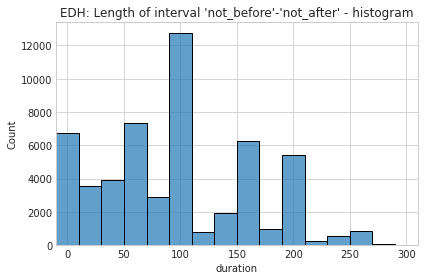

In [65]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.histplot(EDH_dated["duration"], kde=False, bins=range(-10, 310,20), color="tab:blue", alpha=0.7, ax=ax)
ax.set_xlim(-10, 310)
ax.set_title("EDH: Length of interval 'not_before'-'not_after' - histogram")

In [66]:
#sddk.write_file("SDAM_data/EDH/public/EDH_durations_hist_2020-10-07.png", fig, conf)

Text(0.5, 1.0, "EDH: Length of interval 'not_before' - 'not_after'")

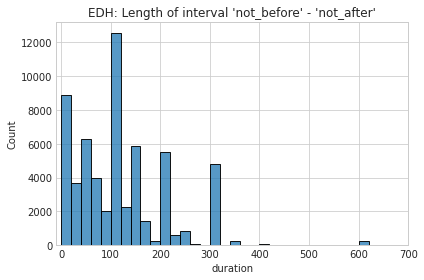

In [67]:
# for Petra
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.histplot(EDH_dated["duration"], kde=False, bins=range(0, 700,20), ax=ax)
ax.set_xlim(-10, 700)
ax.set_title("EDH: Length of interval 'not_before' - 'not_after'")

In [27]:
#sddk.write_file("SDAM_data/EDH/public/EDH_durations.png", fig, conf)

# Random dates

In [68]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset, it takes approx. 60 seconds
EDH_dated["random_dates"] =EDH_dated.apply(lambda row: model_date(row["not_before"], row["not_after_new"], size=1000,), axis=1)

CPU times: user 27.4 s, sys: 428 ms, total: 27.8 s
Wall time: 27.8 s


In [72]:
EDH_dated.columns

Index(['responsible_individual', 'type_of_inscription', 'letter_size',
       'not_after', 'literature', 'work_status', 'height', 'diplomatic_text',
       'people', 'depth', 'material', 'type_of_monument', 'province_label',
       'width', 'transcription', 'country', 'uri', 'findspot_ancient',
       'last_update', 'modern_region', 'findspot_modern', 'language', 'id',
       'edh_geography_uri', 'commentary', 'trismegistos_uri', 'not_before',
       'findspot', 'year_of_find', 'present_location', 'external_image_uris',
       'religion', 'fotos', 'geography', 'social_economic_legal_history',
       'military', 'coordinates', 'idno_tm', 'placenames_refs', 'text_edition',
       'origdate_text', 'layout_execution', 'layout_execution_text',
       'support_objecttype', 'support_objecttype_text', 'support_material',
       'support_material_text', 'support_decoration', 'keywords_term',
       'keywords_term_text', 'type_of_inscription_clean',
       'type_of_inscription_certainty', 'heigh

In [ ]:
'type_of_inscription',  'material', 'type_of_monument', 'province_label', 'language', 'layout_execution', 'support_objecttype', 'keywords_term',

In [69]:
EDH_dated[["id", "not_before", "not_after", "random_dates"]][300:320]

,id,not_before,not_after,random_dates
314,HD000315,1.0,200.0,"[97, 14, 174, 76, 157, 15, 40, 76, 56, 197, 5,..."
315,HD000316,151.0,200.0,"[193, 195, 198, 192, 186, 198, 198, 180, 155, ..."
316,HD000317,1.0,100.0,"[35, 92, 6, 43, 64, 80, 10, 87, 10, 8, 34, 8, ..."
317,HD000318,101.0,200.0,"[158, 160, 130, 106, 108, 125, 171, 160, 156, ..."
318,HD000319,151.0,230.0,"[202, 167, 180, 197, 181, 204, 200, 179, 176, ..."
319,HD000320,161.0,180.0,"[168, 176, 164, 174, 175, 170, 175, 171, 167, ..."
320,HD000321,101.0,200.0,"[132, 106, 143, 166, 176, 140, 195, 125, 154, ..."
321,HD000322,71.0,170.0,"[168, 102, 125, 87, 77, 83, 102, 167, 164, 149..."
322,HD000323,1.0,300.0,"[70, 223, 58, 236, 48, 69, 41, 143, 157, 94, 1..."
323,HD000324,150.0,300.0,"[207, 225, 201, 267, 190, 225, 284, 158, 295, ..."


In [70]:
%%time
# it takes approx. 50 seconds
EDH_complete_simulations = timeblocks_from_randoms(EDH_dated, "random_dates", [-300, 700, 50])

CPU times: user 27.8 s, sys: 116 ms, total: 27.9 s
Wall time: 27.9 s


In [73]:
# example of one result
pd.DataFrame(EDH_complete_simulations[0])

,0,1
0,"(-300, -251)",14
1,"(-250, -201)",11
2,"(-200, -151)",41
3,"(-150, -101)",75
4,"(-100, -51)",237
5,"(-50, -1)",1099
6,"(1, 50)",4995
7,"(51, 100)",6847
8,"(101, 150)",10627
9,"(151, 200)",12939


In [74]:
first_10_sims = pd.DataFrame(EDH_complete_simulations[0], columns=["timeblock", "sim 0"])
for n in range(1, 10):
    first_10_sims["sim " + str(n)] = [tup[1] for tup in EDH_complete_simulations[n]]
first_10_sims

,timeblock,sim 0,sim 1,sim 2,sim 3,sim 4,sim 5,sim 6,sim 7,sim 8,sim 9
0,"(-300, -251)",14,13,10,12,9,10,11,7,7,13
1,"(-250, -201)",11,16,15,16,16,18,16,19,21,17
2,"(-200, -151)",41,32,39,35,36,30,37,40,35,40
3,"(-150, -101)",75,87,78,81,79,88,85,80,84,82
4,"(-100, -51)",237,225,223,223,234,232,230,245,225,223
5,"(-50, -1)",1099,1086,1114,1097,1111,1103,1108,1061,1134,1100
6,"(1, 50)",4995,4962,4970,5003,5030,4990,4932,4951,4991,4905
7,"(51, 100)",6847,6798,6828,6807,6774,6840,6901,7013,6883,6852
8,"(101, 150)",10627,10798,10649,10695,10701,10673,10637,10662,10731,10588
9,"(151, 200)",12939,12923,12755,12899,12941,12826,12952,12831,12785,12983


In [75]:
#set_with_dataframe(EDH_overview.add_worksheet("first_10_sims", 1, 1), first_10_sims)

In [76]:
def desc_stat_from_simulations(simulations):
    tups_desc = []
    for n in range(len(simulations[0])):
        values = [sim[n][1] for sim in simulations]
        tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values)))
    tups_desc_df = pd.DataFrame(tups_desc)
    tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median"]
    return tups_desc_df

In [77]:
sims_by_blocks = desc_stat_from_simulations(EDH_complete_simulations)
#sims_by_blocks.set_index("temp_block", inplace=True)
sims_by_blocks

,temp_block,min,max,mean,median
0,"(-300, -251)",4,20,10.645,11.0
1,"(-250, -201)",9,24,16.220,16.0
2,"(-200, -151)",30,49,38.625,39.0
3,"(-150, -101)",67,95,80.895,81.0
4,"(-100, -51)",204,250,228.090,228.0
5,"(-50, -1)",1056,1153,1103.914,1104.0
6,"(1, 50)",4833,5122,4979.975,4979.0
7,"(51, 100)",6680,7019,6853.435,6851.5
8,"(101, 150)",10449,10921,10686.812,10691.0
9,"(151, 200)",12601,13156,12892.475,12893.5


In [78]:
# compare in how many instances is there less inscriptions for the first half of the 6th c. than for the second half.
# out of 1000
# e.g. 55 means 5.5%

len([sim for sim in EDH_complete_simulations if sim[16][1] < sim[17][1]])

60

In [79]:
#set_with_dataframe(EDH_overview.add_worksheet("sims_by_blocks", 1, 1), sims_by_blocks)

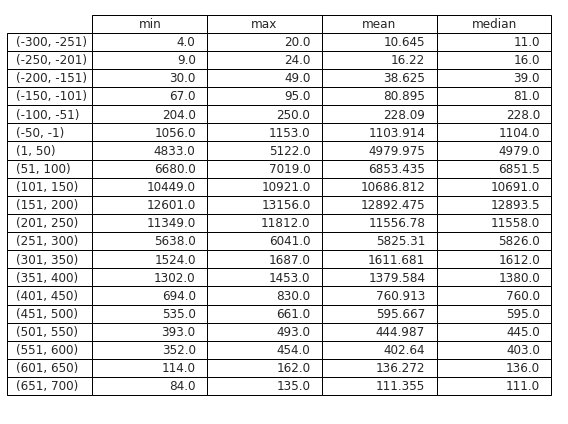

In [80]:
# plot the table

fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)
tabla = pd.plotting.table(ax, sims_by_blocks.set_index("temp_block"), loc='upper right', colWidths=[0.2]*len(sims_by_blocks.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) 

In [81]:
#sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks_2020-10-02.png", fig, conf)

In [82]:
# compare in how many instances is there less inscriptions for the first half of the 6th c. than for the second half.
len([sim for sim in EDH_complete_simulations if sim[16][1] < sim[17][1]])

60

# Generate average dates (arithmetic means)
(for comparison)

In [83]:
# for a comparison, generate dates based on average values, it takes approx. 5 seconds
def get_avr(row):
  try: 
    avr = int(np.round(np.mean([row["not_before"], row["not_after_new"]])))
  except:
    avr = np.nan
  return avr

EDH_dated["date_avr"] = EDH_dated.apply(lambda row: get_avr(row), axis=1)

#EDH_avr_blocks_ = dates_per_block(EDH_date_avr, sims_by_blocks.index.tolist())

In [84]:
print(EDH_dated["date_avr"].tolist()[:100])

[100, 126, 150, 176, 100, 110, -76, 150, 250, 150, 61, 350, 250, 82, 150, 126, -36, 150, 150, -36, 144, -16, 216, 370, 0, 76, 159, -65, 216, 150, 0, 50, 150, 250, 136, 250, 350, 176, -50, 250, -26, -50, 216, 26, 200, 86, 126, 150, -54, 100, 200, 213, 221, 406, 100, 211, 50, 100, 211, 0, 100, 210, 150, 250, 350, 200, 100, 150, -50, 100, 150, 212, 150, 150, 250, 100, 150, 250, 76, 150, 200, 166, 150, 150, -20, 150, 150, 300, 100, 136, 350, 150, 350, 50, 50, 150, 300, 146, 86, -50]


In [85]:
count_by_block = dates_per_block(EDH_dated["date_avr"], sims_by_blocks["temp_block"].tolist())
count_by_block_df = pd.DataFrame(count_by_block)
count_by_block_df.columns = ["temp_block", "count"]
count_by_block_df

,temp_block,count
0,"(-300, -251)",4
1,"(-250, -201)",17
2,"(-200, -151)",37
3,"(-150, -101)",75
4,"(-100, -51)",159
5,"(-50, -1)",1025
6,"(1, 50)",4671
7,"(51, 100)",6609
8,"(101, 150)",13879
9,"(151, 200)",14078


# Aoristic sum

In [113]:
def get_aoristic(startdate, enddate, timeblocks_tuples):
    aoristic_probs = {}
    try:
        startdate, enddate = int(startdate), int(enddate)
        ind_year_prob = np.round(1 / len([n for n in range(startdate, enddate + 1)]), 5)
        for timeblock in timeblocks_tuples:
            possibledates = [n for n in range(startdate, enddate + 1)]
            timeblock_range = [n for n in range(timeblock[0], timeblock[1] + 1)]
            aoristic_probs[timeblock] = np.round(len(set(possibledates) & set(timeblock_range)) * ind_year_prob, 5)
    except:
        for timeblock in timeblocks_tuples:
            aoristic_probs[timeblock] = 0
    return aoristic_probs    

In [114]:
EDH_dated["aoristic"] = EDH_dated.apply(lambda row: get_aoristic(row["not_before"], row["not_after_new"], timeblocks_tuples), axis=1)

In [117]:
EDH_dated[["not_before", "not_after", "aoristic"]]

,not_before,not_after,aoristic
0,71.0,130.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
1,51.0,200.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
2,131.0,170.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
3,151.0,200.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
4,1.0,200.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
...,...,...,...
81471,131.0,200.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
81472,1.0,300.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
81473,101.0,300.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
81474,161.0,222.0,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."


In [115]:
EDH_dated["aoristic"].tolist()[4]

{(-300, -251): 0.0,
 (-250, -201): 0.0,
 (-200, -151): 0.0,
 (-150, -101): 0.0,
 (-100, -51): 0.0,
 (-50, -1): 0.0,
 (1, 50): 0.25,
 (51, 100): 0.25,
 (101, 150): 0.25,
 (151, 200): 0.25,
 (201, 250): 0.0,
 (251, 300): 0.0,
 (301, 350): 0.0,
 (351, 400): 0.0,
 (401, 450): 0.0,
 (451, 500): 0.0,
 (501, 550): 0.0,
 (551, 600): 0.0,
 (601, 650): 0.0,
 (651, 700): 0.0}

In [123]:
EDH_dated["aoristic"].tolist()[-1] # 161 AD - 222 AD 

{(-300, -251): 0.0,
 (-250, -201): 0.0,
 (-200, -151): 0.0,
 (-150, -101): 0.0,
 (-100, -51): 0.0,
 (-50, -1): 0.0,
 (1, 50): 0.0,
 (51, 100): 0.0,
 (101, 150): 0.0,
 (151, 200): 0.6452,
 (201, 250): 0.35486,
 (251, 300): 0.0,
 (301, 350): 0.0,
 (351, 400): 0.0,
 (401, 450): 0.0,
 (451, 500): 0.0,
 (501, 550): 0.0,
 (551, 600): 0.0,
 (601, 650): 0.0,
 (651, 700): 0.0}

In [130]:
def get_aoristic_sum(prob_dicts_list, timeblocks_tuples):
    aoristic_sum = {}
    for timeblock in timeblocks_tuples:
        aoristic_sum[timeblock] =  np.round(sum([probs[timeblock] for probs in prob_dicts_list]), 5)
    return aoristic_sum

In [131]:
EDH_df_aoristic = get_aoristic_sum(EDH_dated["aoristic"], timeblocks_tuples)

In [140]:
EDH_df_aoristic

{(-300, -251): 10.74536,
 (-250, -201): 16.19891,
 (-200, -151): 38.50338,
 (-150, -101): 80.72168,
 (-100, -51): 227.88811,
 (-50, -1): 1104.62886,
 (1, 50): 4987.68151,
 (51, 100): 6851.33718,
 (101, 150): 10687.48343,
 (151, 200): 12890.51842,
 (201, 250): 11530.7972,
 (251, 300): 5845.04601,
 (301, 350): 1614.24588,
 (351, 400): 1379.48409,
 (401, 450): 760.65765,
 (451, 500): 594.5485,
 (501, 550): 444.25901,
 (551, 600): 403.51995,
 (601, 650): 136.0353,
 (651, 700): 111.68684}

In [ ]:
acclam_aoristic 

# Plot average values, aoristic sum and simulation data together

In [87]:
def plot_timeblocks_data(list_of_timeblocks_data, ax=None, color=None):
  """
  plot timeblocks data as a series of overlapping line plots 
  """
  layers = []
  for timeblocks in list_of_timeblocks_data:
    x = [np.mean(tuptup[0]) for tuptup in timeblocks]
    y = [tuptup[1] for tuptup in timeblocks]
    if ax != None:
        if color != None:
            layer = ax.plot(x, y, color=color)
        else: 
            layer = ax.plot(x, y)
    else:
        if color != None:
            layer = plt.plot(x, y, color=color)
        else: 
            layer = plt.plot(x, y)
    layers.append(layer)
  return layers

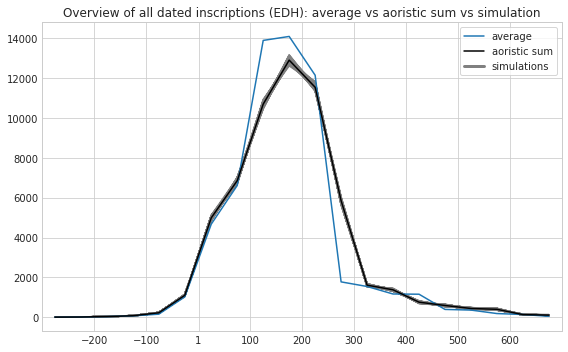

In [141]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)


plot_sim = plot_timeblocks_data(EDH_complete_simulations, ax, "grey")

x = [np.mean(tup) for tup in count_by_block_df["temp_block"]]
y = count_by_block_df["count"]
plot_avr = ax.plot(x, y, color="tab:blue")

plot_aor = ax.plot([np.mean(timeblock) for timeblock in EDH_df_aoristic.keys()], EDH_df_aoristic.values(), color="black")

ax.set_title("Overview of all dated inscriptions (EDH): average vs aoristic sum vs simulation")
ax.set_xticks([-200, -100, 1, 100, 200, 300, 400, 500, 600])

ax.set_xlim(-300, 700)

marker1 = mlines.Line2D([], [], color='tab:blue', label='average')
marker2 = mlines.Line2D([], [], color='black', label='aoristic sum')
marker3 = mlines.Line2D([], [], linewidth=3, color='gray', label='simulations')

ax.legend(handles=[marker1, marker2, marker3], frameon=True)# [plot_avr, plot_aor], ["count by avr", "aoristic sum"])
#plt.show()

In [142]:
sddk.write_file("SDAM_data/EDH/public/EDH_dated_comparison_2020-10-08.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_dated_comparison_2020-10-08.png"


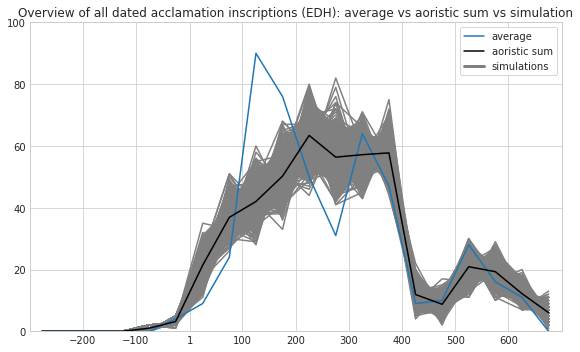

In [137]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)

# SIMULATION
inscription_sim = timeblocks_from_randoms(EDH_acclam,  "random_dates", [-300, 700, 50])
plot_sim = plot_timeblocks_data(inscription_sim, ax=ax, color="grey")

# AVERAGE 
acclam_count_by_block = dates_per_block(EDH_acclam["date_avr"], sims_by_blocks["temp_block"].tolist())
acclam_count_by_block_df = pd.DataFrame(acclam_count_by_block)
acclam_count_by_block_df.columns = ["temp_block", "count"]

x = [np.mean(tup) for tup in acclam_count_by_block_df["temp_block"]]
y = acclam_count_by_block_df["count"]
plot_avr = ax.plot(x, y, color="tab:blue")


# AORISTIC SUM
EDH_acclam = EDH_dated[EDH_dated["type_of_inscription_clean"]=="acclamation"]
EDH_acclam_aoristic = get_aoristic_sum(EDH_acclam["aoristic"], timeblocks_tuples)
plot_aor = ax.plot([np.mean(timeblock) for timeblock in EDH_acclam_aoristic.keys()], EDH_acclam_aoristic.values(), color="black")


ax.set_title("Overview of all dated acclamation inscriptions (EDH): average vs aoristic sum vs simulation")
ax.set_xticks([-200, -100, 1, 100, 200, 300, 400, 500, 600])
ax.set_xlim(-300, 700)
ax.set_ylim(0,100)

marker1 = mlines.Line2D([], [], color='tab:blue', label='average')
marker2 = mlines.Line2D([], [], color='black', label='aoristic sum')
marker3 = mlines.Line2D([], [], linewidth=3, color='gray', label='simulations')

ax.legend(handles=[marker1, marker2, marker3], frameon=True)# [plot_avr, plot_aor], ["count by avr", "aoristic sum"])
#plt.show()

In [138]:
sddk.write_file("SDAM_data/EDH/public/EDH_acclam_comparison_2020-10-08.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_acclam_comparison_2020-10-08.png"


In [210]:
inscription_sim = timeblocks_from_randoms(EDH_acclam,  "random_dates", [-300, 700, 50])
inscription_sim[0]


[((-300, -251), 0),
 ((-250, -201), 0),
 ((-200, -151), 0),
 ((-150, -101), 0),
 ((-100, -51), 0),
 ((-50, -1), 4),
 ((1, 50), 20),
 ((51, 100), 44),
 ((101, 150), 42),
 ((151, 200), 52),
 ((201, 250), 61),
 ((251, 300), 48),
 ((301, 350), 56),
 ((351, 400), 63),
 ((401, 450), 9),
 ((451, 500), 11),
 ((501, 550), 19),
 ((551, 600), 18),
 ((601, 650), 16),
 ((651, 700), 6)]

In [213]:
inscription_sim[0][9], inscription_sim[0][10]

(((151, 200), 52), ((201, 250), 61))

In [215]:
# compare in how many instances is there less inscriptions for the first half of the 6th c. than for the second half.
(len([sim for sim in inscription_sim if sim[9][1] < sim[10][1]]) / 1000 ) * 100

89.1

# Comparison of temporal simulations by the type of inscription

In [143]:
inscriptions = EDH_dated["type_of_inscription_clean"].unique()
inscriptions  = [ins for ins in inscriptions if ins != "NULL"]
inscriptions

['epitaph',
 'honorific inscription',
 'votive inscription',
 'defixio',
 'owner/artist inscription',
 'mile-/leaguestone',
 'acclamation',
 'boundary inscription',
 'building/dedicatory inscription',
 'military diploma',
 'identification inscription',
 'public legal inscription',
 'private legal inscription',
 'label',
 'list',
 'calendar',
 'seat inscription',
 'elogium',
 'assignation inscription',
 'prayer',
 'letter',
 'adnuntiatio']

Text(0.5, 1.0, 'EDH: epitaphs over time')

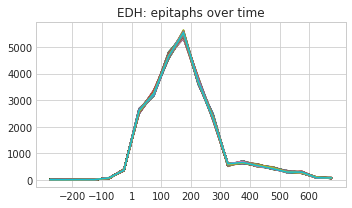

In [144]:
ins_type = "epitaph"
fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
type_insc_df = EDH_dated[EDH_dated["type_of_inscription_clean"]==ins_type]
inscription_sim = timeblocks_from_randoms(type_insc_df,  "random_dates", [-300, 700, 50])
plot_timeblocks_data(inscription_sim, ax=ax)
ax.set_xticks([-200, -100, 1, 100, 200, 300, 400, 500, 600])
ax.set_title("EDH: epitaphs over time")

In [145]:
# how many epitaphs total we have
len(type_insc_df)

25516

In [146]:
# from how many provicens the epitaphs come
len(type_insc_df["province_label_clean"].unique())

63

In [ ]:
sddk.write_file("SDAM_data/EDH/public/EDH_epitaph_2020-10-06.png", fig, conf)

In [148]:
ins_types = dict(EDH_dated["type_of_inscription_clean"].value_counts())
ins_types

{'epitaph': 25516,
 'votive inscription': 13018,
 'NULL': 4770,
 'owner/artist inscription': 4224,
 'honorific inscription': 3576,
 'building/dedicatory inscription': 3107,
 'mile-/leaguestone': 1630,
 'identification inscription': 1377,
 'acclamation': 470,
 'military diploma': 410,
 'list': 328,
 'defixio': 297,
 'label': 232,
 'boundary inscription': 203,
 'public legal inscription': 182,
 'elogium': 138,
 'letter': 121,
 'seat inscription': 66,
 'prayer': 50,
 'private legal inscription': 43,
 'assignation inscription': 16,
 'calendar': 11,
 'adnuntiatio': 3}

In [149]:
# remove "NULL" key-value pair
ins_types.pop("NULL")

4770

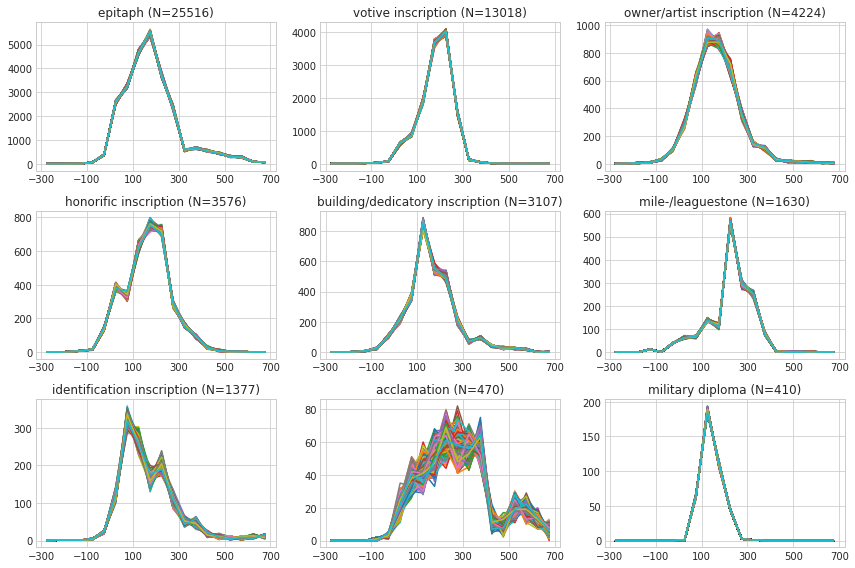

In [150]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), tight_layout=True)

for ax, ins_type in zip(axs.ravel(), list(ins_types.keys())[:9]):
  type_insc_df = EDH_dated[EDH_dated["type_of_inscription_clean"] == ins_type]
  inscription_sim = timeblocks_from_randoms(type_insc_df,  "random_dates", [-300, 700, 50])
  plot_timeblocks_data(inscription_sim, ax=ax)
  ax.set_xticks([-300, -100, 100, 300, 500, 700])
  ax.set_title(ins_type + " (N=" + str(ins_types[ins_type]) + ")")

In [151]:
#sddk.write_file("SDAM_data/EDH/public/EDH_temporal_inscription_types_2020-10-07.png", fig, conf)

# Comparison of temporal simulations by Roman Province

In [152]:
EDH_dated.head(2)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration,random_dates,date_avr,aoristic
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,130.0,60,"[127, 92, 122, 121, 79, 122, 94, 82, 99, 119, ...",100,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,200.0,150,"[65, 64, 178, 172, 193, 80, 72, 121, 177, 199,...",126,"{(-300, -251): 0.0, (-250, -201): 0.0, (-200, ..."


In [153]:
provinces = EDH_dated["province_label_clean"].unique()
provinces

array(['Latium et Campania (Regio I)', 'Roma', 'Baetica', 'Britannia',
       'Aemilia (Regio VIII)', 'Hispania citerior', 'unknown',
       'Alpes Maritimae', 'Apulia et Calabria (Regio II)', 'Narbonensis',
       'Lusitania', 'Samnium (Regio IV)', 'Etruria (Regio VII)', 'Raetia',
       'Pannonia superior', 'Lugdunensis', 'Moesia inferior', 'Dalmatia',
       'Belgica', 'Umbria (Regio VI)', 'Germania inferior',
       'Germania superior', 'Africa Proconsularis', 'Dacia', 'Aquitania',
       'Arabia', 'Mauretania Caesariensis', 'Noricum', 'Numidia',
       'Pannonia inferior', 'Venetia et Histria (Regio X)', 'Barbaricum',
       'Transpadana (Regio XI)', 'Sardinia', 'Aegyptus',
       'Mauretania Tingitana', 'Asia', 'Syria', 'Bithynia et Pontus',
       'Cyrene', 'Moesia superior', 'Macedonia',
       'Bruttium et Lucania (Regio III)', 'Picenum (Regio V)', 'Epirus',
       'Alpes Poeninae', 'Galatia', 'Liguria (Regio IX)',
       'Sicilia, Melita', 'Iudaea', 'Corsica', 'Achaia',
     

In [154]:
len(provinces)

65

In [155]:
provinces_counts = dict(EDH_dated["province_label_clean"].value_counts())
provinces_counts

{'Dalmatia': 7543,
 'Germania superior': 6559,
 'Britannia': 4402,
 'Pannonia superior': 4182,
 'Dacia': 3485,
 'Pannonia inferior': 3109,
 'Germania inferior': 3003,
 'Noricum': 2726,
 'Hispania citerior': 2668,
 'Roma': 2556,
 'Baetica': 2431,
 'Moesia inferior': 1849,
 'Numidia': 1599,
 'Moesia superior': 1327,
 'Africa Proconsularis': 1228,
 'Macedonia': 1088,
 'Raetia': 976,
 'Belgica': 970,
 'Latium et Campania (Regio I)': 820,
 'Achaia': 636,
 'Venetia et Histria (Regio X)': 545,
 'Lusitania': 507,
 'Alpes Cottiae': 465,
 'Etruria (Regio VII)': 458,
 'Alpes Maritimae': 408,
 'Thracia': 369,
 'Narbonensis': 293,
 'Mauretania Caesariensis': 262,
 'unknown': 248,
 'Samnium (Regio IV)': 247,
 'Asia': 215,
 'Aemilia (Regio VIII)': 198,
 'Alpes Poeninae': 194,
 'Apulia et Calabria (Regio II)': 194,
 'Aegyptus': 157,
 'Transpadana (Regio XI)': 154,
 'Umbria (Regio VI)': 151,
 'Liguria (Regio IX)': 133,
 'Bithynia et Pontus': 131,
 'Barbaricum': 130,
 'Epirus': 125,
 'Lugdunensis': 125,

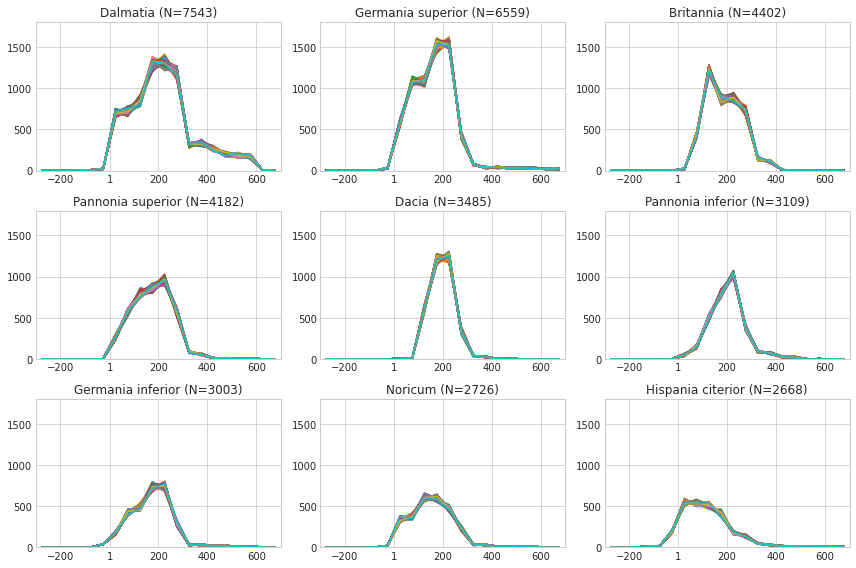

In [156]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), tight_layout=True)

for ax, province in zip(axs.ravel(), list(provinces_counts.keys())[:9]):
  province_df = EDH_dated[EDH_dated["province_label_clean"] == province]
  province_sim = timeblocks_from_randoms(province_df,  "random_dates", [-300, 700, 50])
  plot_timeblocks_data(province_sim, ax=ax)
  ax.set_title(province + " (N=" + str(provinces_counts[province]) + ")")
  ax.set_ylim(0, 1800)
  ax.set_xticks([-200, 1, 200, 400, 600])
  ax.set_xlim(-300, 700)

In [157]:
#sddk.write_file("SDAM_data/EDH/public/EDH_temporal_provinces_2020-10-02.png", fig, conf)

In [158]:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
import matplotlib.colors as mcolors
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())

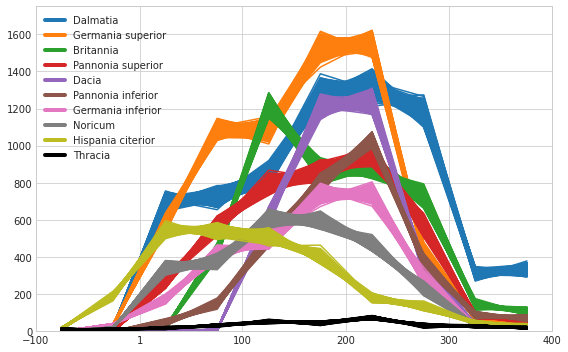

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)

n_of_provinces = 9

markers = []
for province, color in zip(list(provinces_counts.keys())[:n_of_provinces], tab_colors_list[:n_of_provinces]):
    province_df = EDH_dated[EDH_dated["province_label_clean"]==province]
    province_sim = timeblocks_from_randoms(province_df,  "random_dates", [-100, 400, 50])
    layer = plot_timeblocks_data(province_sim, ax=ax, color=color)
    markers.append(mlines.Line2D([], [], linewidth=4, label=province, color=color))

province_df = EDH_dated[EDH_dated["province_label_clean"]=="Thracia"]
province_sim = timeblocks_from_randoms(province_df,  "random_dates", [-100, 400, 50])
layer = plot_timeblocks_data(province_sim, ax=ax, color="black")
markers.append(mlines.Line2D([], [], linewidth=4, label="Thracia", color="black"))
 
ax.set_xlim(-100, 400)
ax.set_xticks([-100, 1, 100, 200, 300, 400])
ax.set_ylim(0, 1750)

ax.legend(handles=markers)
#plt.legend(tab_colors_list[:5], [province[0] for province in provinces_counts[:5]])

In [160]:
#sddk.write_file("SDAM_data/EDH/public/EDH_provinces_merged_2020-10-06.png", fig, conf)

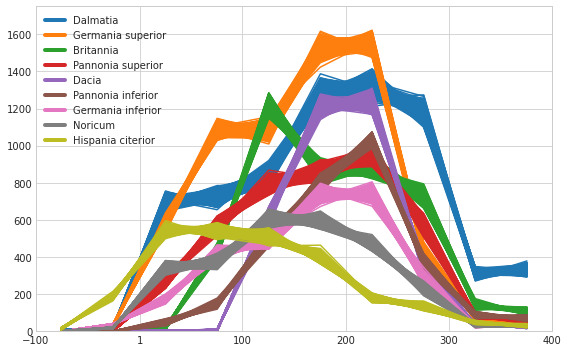

In [161]:
# the same without Thracia
fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)

n_of_provinces = 9

markers = []
for province, color in zip(list(provinces_counts.keys())[:n_of_provinces], tab_colors_list[:n_of_provinces]):
    province_df = EDH_dated[EDH_dated["province_label_clean"]==province]
    province_sim = timeblocks_from_randoms(province_df,  "random_dates", [-100, 400, 50])
    layer = plot_timeblocks_data(province_sim, ax=ax, color=color)
    markers.append(mlines.Line2D([], [], linewidth=4, label=province, color=color))

ax.set_xlim(-100, 400)
ax.set_xticks([-100, 1, 100, 200, 300, 400])
ax.set_ylim(0, 1750)

ax.legend(handles=markers)
#plt.legend(tab_colors_list[:5], [province[0] for province in provinces_counts[:5]])

In [162]:
sddk.write_file("SDAM_data/EDH/public/EDH_provinces_merged_2020-10-08.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_provinces_merged_2020-10-08.png"


In [163]:
PHI = sddk.read_file("SDAM_data/PHI/PHI_cleaned_dated_2020-06-30.json", "df", conf)


In [164]:
PHI.shape

(216702, 25)

In [166]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset, it takes approx. 60 seconds
PHI["random_dates"] =PHI.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 56.9 s, sys: 1.17 s, total: 58.1 s
Wall time: 58.1 s


In [167]:
len(PHI[PHI["random_dates"].notna()])

130533

In [168]:
PHI["duration"] = PHI.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)

In [171]:
durations = []
previous_duration = 0
for duration in [1, 25, 75, 125, 200]:
    if previous_duration == 0:
        durations.append([str(duration), len(PHI[(PHI["duration"]<= duration) & (PHI["duration"] > previous_duration)])])
    else:
        durations.append([str(previous_duration + 1) + "-" +  str(duration), len(PHI[(PHI["duration"]<= duration) & (PHI["duration"] > previous_duration)])])
    previous_duration = duration
durations.append([">200", len(PHI[PHI["duration"]>200])])
durations_df = pd.DataFrame(durations, columns=["less or equal years", "n of inscriptions"])

In [172]:
durations_df

,less or equal years,n of inscriptions
0,1,7474
1,2-25,33634
2,26-75,15704
3,76-125,31322
4,126-200,20534
5,>200,17381


Text(0.5, 1.0, "PHI: Length of interval 'not_before'-'not_after' - bar")

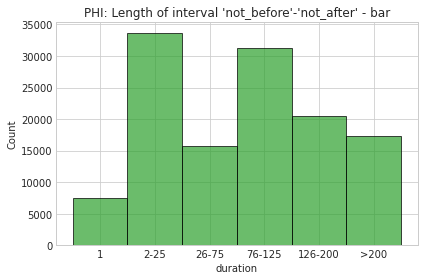

In [174]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(durations_df["less or equal years"], durations_df["n of inscriptions"], edgecolor="black", color="tab:green", alpha=0.7, width=1)
ax.set_xlabel("duration")
ax.set_ylabel("Count")
ax.set_title("PHI: Length of interval 'not_before'-'not_after' - bar")

Text(0.5, 1.0, "PHI: Length of interval 'not_before'-'not_after' - histogram")

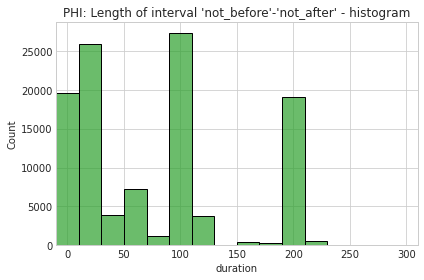

In [175]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.histplot(PHI["duration"], kde=False, bins=range(-10, 310,20), color="tab:green", alpha=0.7, ax=ax)
ax.set_xlim(-10, 310)
ax.set_title("PHI: Length of interval 'not_before'-'not_after' - histogram")

In [186]:
PHI_complete_simulations = timeblocks_from_randoms(PHI, "random_dates", [-800, 800, 50])

In [193]:
get_timeblocks(-800, 800, 100)

[(-800, -701),
 (-700, -601),
 (-600, -501),
 (-500, -401),
 (-400, -301),
 (-300, -201),
 (-200, -101),
 (-100, -1),
 (1, 100),
 (101, 200),
 (201, 300),
 (301, 400),
 (401, 500),
 (501, 600),
 (601, 700),
 (701, 800)]

In [194]:
avr_by_block = dates_per_block(PHI["date_avr"], get_timeblocks(-800, 800, 50))
avr_by_block_df = pd.DataFrame(avr_by_block)
avr_by_block_df.columns = ["temp_block", "count"]
avr_by_block_df

,temp_block,count
0,"(-800, -751)",6
1,"(-750, -701)",48
2,"(-700, -651)",63
3,"(-650, -601)",307
4,"(-600, -551)",397
5,"(-550, -501)",1680
6,"(-500, -451)",3855
7,"(-450, -401)",4450
8,"(-400, -351)",3103
9,"(-350, -301)",9808


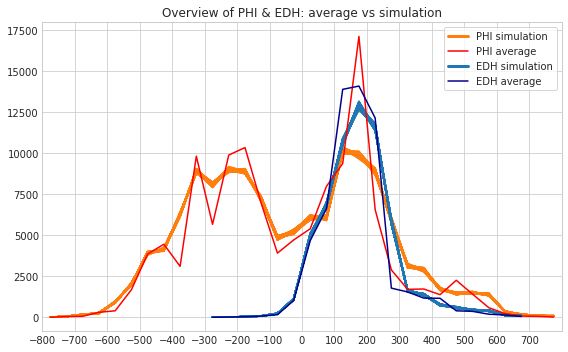

In [198]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)

# PHI sim
sim_plot = plot_timeblocks_data(PHI_complete_simulations, ax, color="tab:orange")



# EDH sim
PHI_plot_sim = plot_timeblocks_data(EDH_complete_simulations, ax, "tab:blue")


# PHI avr
avr_by_block = dates_per_block(PHI["date_avr"], get_timeblocks(-800, 800, 50))
avr_by_block_df = pd.DataFrame(avr_by_block)
avr_by_block_df.columns = ["temp_block", "count"]
avr_by_block_df
x = [np.mean(tup) for tup in avr_by_block_df["temp_block"]]
y = avr_by_block_df["count"]
PHI_avr = ax.plot(x, y, color="red")

# EDH avr
x = [np.mean(tup) for tup in count_by_block_df["temp_block"]]
y = count_by_block_df["count"]
EDH_avr = ax.plot(x, y, color="darkblue")


ax.set_title("Overview of PHI & EDH: average vs simulation")
ax.set_xticks(range(-800, 800, 100))

ax.set_xlim(-800, 800)

marker1 = mlines.Line2D([], [], linewidth=3, color='tab:orange', label='PHI simulation')
marker2 = mlines.Line2D([], [], linewidth=3, color='tab:blue', label='EDH simulation')

marker3 = mlines.Line2D([], [],  color='red', label='PHI average')
marker4 = mlines.Line2D([], [], color='darkblue', label='EDH average')

ax.legend(handles=[marker1, marker3, marker2, marker4], frameon=True)# [plot_avr, plot_aor], ["count by avr", "aoristic sum"])


In [199]:
sddk.write_file("SDAM_data/EDH/public/EDH_PHI_sim_comparison_2020-10-08.png", fig, conf)

A file with the same name ("EDH_PHI_sim_comparison_2020-10-08.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_PHI_sim_comparison_2020-10-08.png"


In [201]:
regions = ["Aegean Islands",
 "Asia Minor",
 "Attica",
 "Central Greece",
 "Northern Greece",
 "Cyprus",
 "Egypt, Nubia and Cyrenaïca",
 "Greater Syria and the East",
 "North Shore of the Black Sea",
 "Peloponnesos",
 "Sicily, Italy, and the West",
 "Thrace and the Lower Danube",
 "Upper Danube",
  "North Africa"]

In [202]:
for region in regions:
  print(region, len(PHI[PHI["hdr1"].str.contains(region)]))

Aegean Islands 29444
Asia Minor 50226
Attica 32652
Central Greece 18582
Northern Greece 10715
Cyprus 4590
Egypt, Nubia and Cyrenaïca 14044
Greater Syria and the East 11028
North Shore of the Black Sea 4780
Peloponnesos 7968
Sicily, Italy, and the West 16201
Thrace and the Lower Danube 14627
Upper Danube 1260
North Africa 583


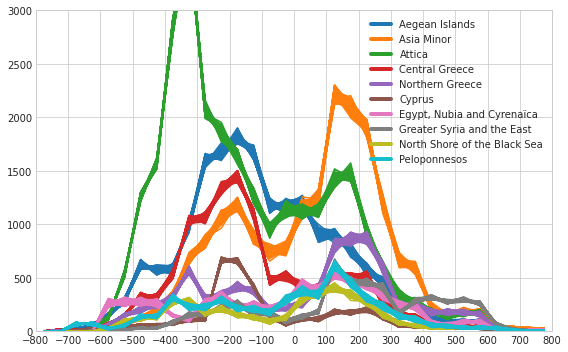

In [206]:
# the same without Thracia
fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)

n_of_provinces = 9

markers = []

for region, color in zip(regions[:10], tab_colors_list[:10]):
    region_df = PHI[PHI["hdr1"].str.contains(region)]
    region_sim = timeblocks_from_randoms(region_df,  "random_dates", [-800, 800, 50])
    layer = plot_timeblocks_data(region_sim, ax=ax, color=color)
    markers.append(mlines.Line2D([], [], linewidth=4, label=region, color=color))


ax.set_xlim(-800, 800)
ax.set_xticks(range(-800, 900, 100))
ax.set_ylim(0, 3000)

ax.legend(handles=markers)
#plt.legend(tab_colors_list[:5], [province[0] for province in provinces_counts[:5]])

In [207]:
sddk.write_file("SDAM_data/EDH/public/PHI_sim_merged_2020-10-08.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/PHI_sim_merged_2020-10-08.png"
